# Programmatic Access to PubChem

<br>  

Written by:  

**Sunghwan Kim, Ph.D., M.Sc.**  (sunghwan.kim@nih.gov)  
National Center for Biotechnology Information  
National Library of Medicine  
National Institutes of Health

![ACS-Spring-2023](./images/acs-spring-2023.jpg)

This Jupyter notebook was prepared for a presentation at the American Chemical Society (ACS) Spring 2023 National Meeting in Indianapolis, IN. This notebook demonstrates how to programmatically access PubChem data through its programmatic access interfaces, including **PUG-REST**, **PUG-View**, and **Entrez-Utilities**.  More detailed information on these interfaces can be found in the following papers:

>>
>**PUG-SOAP and PUG-REST: web services for programmatic access to chemical information in PubChem**  
>*Nucleic Acids Research*, 2015, 43(W1):W605-W611  
>doi:[10.1093/nar/gkv396](https://doi.org/10.1093/nar/gkv396)  
>
>**An update on PUG-REST: RESTful interface for programmatic access to PubChem**  
>*Nucleic Acids Res.* 2018 July 2; 46(W1):W563-570.  
>doi:[10.1093/nar/gky294](https://doi.org/10.1093/nar/gky294).  
>
>**PUG-View: programmatic access to chemical annotations integrated in PubChem**  
>*J. Cheminform.* 2019, 11, 56.  
>doi:[10.1186/s13321-019-0375-2](https://doi.org/10.1186/s13321-019-0375-2)  

This Jupyter notebook was written based on a series of materials available on LibreTexts:

- Getting Molecular Properties through PUG-REST \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/01%3A_Introduction/1.10%3A_Python_Assignment_1)\]
- Chemical Structure Inputs for PUG-REST \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/02%3A_Representing_Small_Molecules_on_Computers/2.07%3A_Python_Assignment/2.7.01%3A_Python_Assignment_2A)\]
- Interconversion between PubChem records \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/02%3A_Representing_Small_Molecules_on_Computers/2.07%3A_Python_Assignment/2.7.02%3A_Python_Assignment_2B)\]
- Compound vs Substance \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/03%3A_Database_Resources_in_Cheminformatics/3.08%3A_Python_Assignment)\]
- Structure Search \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/04%3A_Searching_Databases_for_Chemical_Information/4.06%3A_Python_Assignments)\]
- Molecular Similarity \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity)\]
- Virtual Screening \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/07%3A__Computer-Aided_Drug_Discovery_and_Design/7.03%3A_Python_Assignment-Virtual_Screening)\]
- Machine Learning Basics \[[Link](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/08%3A_Machine-learning_Basics/8.03%3A_Python_Assignment)\]





These materials were developed during the Cheminformatics OnLine Chemistry Course (OLCC), a collaborative teaching project to teach Cheminformatics concurrently at multiple campuses.  Please see the following paper for more information: 

>**Teaching Cheminformatics through a Collaborative Intercollegiate Online Chemistry Course (OLCC)**<br>
>*J. Chem. Educ.* 2021, 98(2):416–425
>doi:[10.1021/acs.jchemed.0c01035](https://doi.org/10.1021/acs.jchemed.0c01035)

## PUG-REST Basics

### Syntax of PUG-REST request URLs 

In PUG-REST, (almost) all necessary information for a web service request is encoded in a request URL, which consists of the following parts:
- Prologue : "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
- Input : input identifiers specified with:
   - chemical names 
   - PubChem identifiers \[e.g., Compound ID (CID), Substance ID (SID), BioAssay ID (AID)\]
   - chemical structures (in SMILES, InChI, SDF)
- Operation: a task that you want to perform.
- Output : a desired format of the output.
- Option : optional parameters specific to some tasks.  
<br>  

![](./images/pug-rest-syntax.jpg)

In [1]:
import requests

In [2]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/name/water"
pugoper = "property/MolecularFormula"
pugout  = "csv"

url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/csv


Alternatively, you use ```str.join()``` to construct the URL.

In [3]:
url = "/".join( [pugrest, pugin, pugoper, pugout] )
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/csv


Then, you can submit the request to PubChem and check the returned result.

In [4]:
res = requests.get(url)
print(res.text)

"CID","MolecularFormula"
962,"H2O"



### Usage policies and dynamic traffic throttling

PubChem has a standard time limit of **30 seconds** per web service request. If a request is not completed within the 30-second limit for any reason, a timeout error will be returned.

All PubChem web pages (or requests to NCBI in general) have a policy that users should throttle their web page requests, which includes web-based programmatic services. Violation of usage policies may result in the user being temporarily blocked from accessing PubChem (or NCBI) resources. The current request volume limits are:
- No more than 5 requests per second.
- No more than 400 requests per minute.
- No longer than 300 second running time per minute.


It should be noted that these limits can be lowered through the **dynamic traffic control** at times of excessive load, as described in the following page:  
  
https://pubchem.ncbi.nlm.nih.gov/docs/dynamic-request-throttling  
  
  
Throttling information is provided in the HTTP header response, indicating the system-load state and the per-user limits. 

In [5]:
#dir(res)
print(res.headers)

{'Date': 'Sun, 26 Mar 2023 03:59:02 GMT', 'Server': 'Apache', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Referrer-Policy': 'origin-when-cross-origin', 'Content-Security-Policy': 'upgrade-insecure-requests', 'Cache-Control': 'private', 'Expires': 'Sun, 26 Mar 2023 11:59:02 GMT', 'NCBI-PHID': '90C5C93741FC30610000000000000001.m_1', 'NCBI-SID': '90C5C93741FC3061_0000SID', 'X-Throttling-Control': 'Request Count status: Green (0%), Request Time status: Green (0%), Service status: Green (3%)', 'Content-Type': 'text/csv', 'Set-Cookie': 'ncbi_sid=90C5C93741FC3061_0000SID; domain=.nih.gov; path=/; expires=Tue, 26 Mar 2024 03:59:02 GMT', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'X-UA-Compatible': 'IE=Edge', 'X-XSS-Protection': '1; mode=block', 'Access-Control-Allow-Origin': '*', 'Keep-Alive': 'timeout=4, max=40', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked'}


In [6]:
print(res.headers['X-Throttling-Control'])

Request Count status: Green (0%), Request Time status: Green (0%), Service status: Green (3%)


Based on this throttling information, the user should moderate the speed at which requests are sent to PubChem.

## Multiple Inputs and Multiple properties

PUG-REST can be used to multiple properties for multiple chemicals.  The input chemicals should be provided as a list of PubChem Compound IDs (CIDs), separated by commas (",").  The desired molecular properties are also provided as a comma-separated list.  A list of supported molecular properties can be found at this page:

https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest#section=Compound-Property-Tables

In [7]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/2200,2725,3100,4034,4927"
pugoper = "property/MolecularFormula,MolecularWeight,IsomericSMILES,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount"
pugout  = "csv"   #- comma-separated values
url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout

In [8]:
res = requests.get(url)
print(res.text)

"CID","MolecularFormula","MolecularWeight","IsomericSMILES","HBondDonorCount","HBondAcceptorCount","RotatableBondCount","HeavyAtomCount"
2200,"C17H19N3",265.35,"C1CN=C(N1)CN(CC2=CC=CC=C2)C3=CC=CC=C3",1,2,5,20
2725,"C16H19ClN2",274.79,"CN(C)CCC(C1=CC=C(C=C1)Cl)C2=CC=CC=N2",0,2,5,19
3100,"C17H21NO",255.35,"CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2",0,2,6,19
4034,"C25H27ClN2",390.9,"CC1=CC(=CC=C1)CN2CCN(CC2)C(C3=CC=CC=C3)C4=CC=C(C=C4)Cl",0,2,5,28
4927,"C17H20N2S",284.4,"CC(CN1C2=CC=CC=C2SC3=CC=CC=C31)N(C)C",0,3,3,20



You can also save the data in a file.

In [9]:
with open('multi-input-multi-props.csv', 'w') as file:
    file.write(res.text)

## Very Long Request URLs

Python's ```str.join()``` method is a convenient way to create a comma-separated list that can be used in a PUG-REST request URL.

In [10]:
props = [ 'MolecularFormula',
          'MolecularWeight',
          'IsomericSMILES',
          'HBondDonorCount',
          'HBondAcceptorCount',
          'RotatableBondCount',
          'HeavyAtomCount']

props_str = ",".join(props)
print(props_str)

MolecularFormula,MolecularWeight,IsomericSMILES,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount


In [11]:
cids1 = [ 443422,  72301,   8082,    4485,    5353740, 5282230, 5282138, 1547484, 941361, 5734,  \
         5494,    5422,    5417,    5290,    5245,    5026,    4746,    4507,    4499,   4497,  \
         4494,    4474,    4418,    4386,    4009,    4008,    3949,    3926,    3878,   3784,  \
         3698,    3547,    3546,    3336,    3333,    3236,    3076,    2585,    2520,   2351,  \
         2312,    2162,    1236,    1234,    292331,  275182,  235244,  108144,  104972, 77157, \
         5942250, 5311217, 4564402, 4715169, 5311501]

print(len(cids1))

cids1_str = ",".join([str(x) for x in cids1])
#print(cids1_str)

55


In [12]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/" + cids1_str
pugoper = "property/" + props_str
pugout  = "csv"
url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)

res = requests.get(url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/443422,72301,8082,4485,5353740,5282230,5282138,1547484,941361,5734,5494,5422,5417,5290,5245,5026,4746,4507,4499,4497,4494,4474,4418,4386,4009,4008,3949,3926,3878,3784,3698,3547,3546,3336,3333,3236,3076,2585,2520,2351,2312,2162,1236,1234,292331,275182,235244,108144,104972,77157,5942250,5311217,4564402,4715169,5311501/property/MolecularFormula,MolecularWeight,IsomericSMILES,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount/csv
"CID","MolecularFormula","MolecularWeight","IsomericSMILES","HBondDonorCount","HBondAcceptorCount","RotatableBondCount","HeavyAtomCount"
443422,"C20H21NO4",339.4,"COC1=C(C2=C(C[C@@H]3C4=CC5=C(C=C4CCN3C2)OCO5)C=C1)OC",0,5,2,25
72301,"C21H25NO4",355.4,"COC1=C(C2=C(C[C@H]3C4=CC(=C(C=C4CCN3C2)OC)OC)C=C1)OC",0,5,4,26
8082,"C5H11N",85.15,"C1CCNCC1",1,1,0,6
4485,"C17H18N2O6",346.3,"CC1=C(C(C(=C(N1)C)C(=O)OC)C2=CC=CC=C2[N+](=O)[O-])C(=O)OC",1,7,5,25
5353740,"C25H36O5",416.5,"CC1=C(C(CCC1)(C)C)CC/C(=C

Now suppose that you have a longer list like this.

In [13]:
cids=[11,135,176,243,280,281,284,299,379,612,702,712,727,784,802,931,947,991,992,1004,1032,1045,1068,1118,1176,1480,1486,1489,1639,1732,1923,1982,1988,2078,2087,2256,2268,2314,2319,2328,2450,2519,2566,2728,2730,2871,2912,2943,2969,3017,3030,3031,3037,3039,3048,3082,3118,3120,3224,3225,3239,3286,3289,3293,3314,3346,3347,3352,3374,3444,3485,3496,3526,3589,3598,3776,3893,4004,4096,4101,4109,4115,4130,4169,4420,4618,4685,4690,4767,4790,4793,4794,4875,4929,4931,4933,4936,4937,4944,5053,5125,5192,5216,5234,5338,5383,5392,5430,5455,5543,5569,5759,5794,5853,5862,5943,5988,5993,6129,6209,6323,6325,6336,6343,6348,6354,6418,6423,6466,6492,6531,6564,6585,6635,6636,6643,6654,6719,6720,6733,6758,6780,6795,6861,6862,6885,6989,7017,7095,7153,7158,7204,7207,7328,7362,7430,7439,7456,7474,7541,7551,7560,7628,7639,7794,7839,7858,7873,8025,8050,8058,8081,8091,8158,8163,8174,8193,8205,8209,8257,8264,8268,8286,8292,8297,8305,8330,8342,8370,8381,8393,8422,8425,8427,8594,8606,8607,8630,8722,8753,8797,8800,8809,8843,9011,9272,9298,9411,9477,9502,9864,10087,10107,10112,10234,10340,10522,10606,10788,10800,10813,11057,11145,11167,11304,11442,11487,12232,12393,12531,12541,12542,12898,12901,12932,12968,12988,13081,13214,13263,13290,13450,13526,13676,13707,13709,13728,13745,13783,13837,13904,14145,14210,14215,14250,14251,14322,14337,14778,14780,14798,14846,14993,14994,15115,15331,15530,15531,15546,15553,15583,15629,15666,15787,15910,15939,15951,15965,16003,16007,16073,16115,16116,16181,16248,16315,16422,16554,16556,16559,16562,16653,16685,16686,16769,16774,16826,16945,17038,17109,17110,17169,17345,17432,17434,17435,17516,17517,17531,17581,17607,17748,17947,18290,18743,18771,18996,19167,19395,19402,19518,19588,19649,19662,19756,19999,20226,20848,20965,21207,21307,21330,21803,21929,21954,22094,22188,22206,22772,23256,23421,23558,23715,23717,24393,24404,24456,24470,24482,24540,24563,24685,24743,24744,24781,24798,24823,24833,24850,24861,24870,24874,24877,24883,25146,25429,25572,25670,25912,26033,26049,26124,26229,26576,26597,26694,26710,26927,27159,27189,27195,27295,27375,27689,27760,27982,28127,28169,28292,28299,28780,28935,28936,29216,29307,29393,29697,29732,29863,30332,30479,30684,30692,30773,30856,30859,31070,31099,31200,31645,31677,31899,31957,32154,32184,32490,32518,32739,32872,32921,33257,33294,33360,33443,33528,33565,33775,34192,34313,34468,34526,34766,35699,35970,36242,36250,36324,36565,36584,36606,36679,36867,36870,36879,37123,37125,37175,37419,37517,37523,37829,37869,37995,38235,38479,38687,38779,38854,38884,39040,39223,39230,39327,39385,39425,39676,39681,39722,39965,40087,40326,40585,40896,41368,41381,41384,41385,41428,41463,41632,41648,42504,42586,42614,42807,42850,43079,43226,43233,43234,43359,44073,44178,44465,47326,47445,47491,47759,47866,47898,48132,49384,50367,50465,50590,50895,50980,51369,51556,51574,51605,52999,53309,53597,53735,54382,54738,54739,54740,54778,54886,54901,55790,58167,61021,61103,61546,61899,61906,61938,62020,62155,62210,62276,62306,62389,62581,62773,65174,65420,66461,69985,71245,71482,71777,71853,73281,73282,73665,73668,73669,73670,73671,73672,73674,73675,75778,77338,78458,79241,80277,81769,83975,84098,85543,85712,85734,86102,86122,86132,86134,86137,86138,86160,86173,86175,86210,86211,86222,86233,86268,86296,86298,86306,86309,86353,86354,86355,86356,86367,86369,86398,86412,86417,86422,86426,86429,86443,87176,88916,89594,90590,90756,91466,91587,91596,91612,91625,91627,91634,91644,91650,91655,91656,91664,91665,91673,91677,91679,91683,91687,91692,91693,91694,91699,91701,91708,91715,91716,91724,91727,91731,91733,91734,91735,91739,91740,91741,91742,91744,91749,91751,91752,91753,91754,91755,91756,91757,91758,91759,91760,91762,91766,91768,91770,91771,91772,91773,91774,91776,91777,91778,91779,92299,92316,92383,92389,92395,92420,92425,92430,92433,93200,93315,93357,93365,93379,93422,93460,93482,93483,93528,93532,93539,93541,94498,100633,104770,104926,105010,107646,107720,107901,108581,114850,115196,115224,119435,119653,122087,123377,123626,123627,127394,151080,152031,153847,153920,153974,157722,158076,158924,162117,162381,167454,170012,170354,173964,175967,176648,176879,177355,177861,177863,178368,178565,178795,180089,182951,185588,188694,194454,195429,197225,210326,213012,213013,213016,213021,213031,213032,222548,285670,312440,439306,439551,439570,441071,441871,443029,443031,443046,443048,443055,443067,443495,443629,445639,448979,449402,455149,516871,516872,516875,516892,516893,517065,517111,517165,522636,546164,546977,560193,560256,571084,616765,637511,637563,637566,638011,656671,688597,697993,969491,1549108,1617113,1747818,1787910,1794807,1794808,2723790,2723816,2723872,2724247,2734819,2804318,3000605,3001858,3014032,3015768,3017748,3032296,3032297,3032472,3032555,3032571,3032572,3032581,3032604,3032791,3032792,3033865,3034198,3034285,3034287,3034368,3034378,3034380,3034435,3037186,3081363,3083545,3086172,3294375,3317081,3391107,3423265,3482402,3485262,3566770,3623881,4131668,4228010,4403158,4408229,4560140,5280793,5280795,5281162,5281166,5281303,5281872,5281873,5281874,5281875,5283292,5283295,5283305,5284376,5284389,5284462,5284484,5284507,5353758,5355863,5360460,5360521,5360962,5361043,5361250,5362131,5362527,5362811,5363095,5363216,5363233,5363237,5363260,5363261,5363351,5363377,5363381,5363387,5363405,5363527,5363548,5364079,5364468,5364495,5364497,5364643,5364711,5364714,5364932,5365075,5366546,5367650,5367692,5368008,5369793,5371455,5371560,5371562,5372194,5372405,5372582,5377784,5377791,5463781,5483846,5483847,5483872,5485188,5486793,5493321,5497163,5748526,5821911,5842000,5851439,5889665,6023583,6035168,6089962,6097028,6100711,6112114,6125184,6165177,6327054,6327657,6328134,6336603,6386307,6422843,6431341,6432198,6433329,6434236,6435500,6436029,6436449,6436604,6436606,6436633,6436680,6437401,6437842,6440554,6440556,6440557,6440728,6440779,6442842,6450826,6451057,6451139,6451142,6451155,6451159,6455379,6537961,6537963,6540498,6914821,7057995,7082413,9568069,9570071,9570290,9571009,9576037,9576091,9576412,9578570,9595287,9601227,9796266,9809914,9827529,9828343,9834513,9862076,9869793,9881821,9907412,9930667,9948894,9954185,9955886,9969573,10085783,10110536,10140464,10157484,10219853,10234702,10238657,10313079,10342051,10403199,10915750,10935908,10936292,10938769,10958189,11046097,11048796,11057771,11067463,11091168,11097730,11136686,11140605,11150163,11158353,11159021,11174640,11188745,11193251,11205153,11236201,11264867,11271640,11285653,11292824,11302979,11338509,11348992,11350631,11388558,11407474,11419598,11434448,11486133,11488729,11493665,11496052,11496886,11520759,11534837,11549937,11556910,11556911,11571392,11571555,11578610,11585730,11614934,11636326,11650986,11657899,11664966,11674113,11688533,11693711,11700495,11707647,11714234,11759286,11784975,11842644,11949285,11990852,12056760,12310947,12313523,12358480,12358497,12573513,12617362,12617363,12617364,12617365,12891182,13013865,13039062,13072122,13218777,13229577,13307026,13389335,13633097,14371531,15056663,15096494,15215907,15558638,15604010,15825719,16095400,16211101,16212118,16212969,16213016,16656802,16682746,16682804,16683004,16693908,16722118,16723172,16752772,17988638,18772482,18772487,19758701,19977704,20056430,20056433,20593234,21873022,21896651,21954885,22833361,22883840,23082663,23615703,23664719,23665571,23665759,23665760,23668198,23676745,23682187,24822142,24860538,24864132,25113606,25271089,29934831,44146693,44151818,44473182,45356890,45358380,46173707,46174049,46893156,46944253,51039126,53249225,53297383,53297414,53341374,53491464,53627428,54589430,54598431,54670067,54675779,54676884,54678486,54678504,54680085,54680676,54682651,54689800,54698175,56608859,56840841,56933411,56945144,56945145,57006186,57343740,57414497,57507888,59558935,59988032,60006000,60202781,66553206,68289416,70495450,70652048,71230671,71310221,71312306,71463595,71593923,71657865,72980153,73995022,76007601,76957227,76959035,86287518,86287519,86287521,86289068,86572672,86739665,89881183,89968867,90169437,90478478,101260859,101611446,101678929,101815861,101815863,102004933,102515299,118701038,121463656,121494065,122715527,123670820,124708617,129316835,135398658,135424353,135424354,135438605,135491728,135491830,135492483,135499147,135503327,135515530,135529435,135565117,135571111,135585373,135616186,135618618,135779804,135846942,136257761,136737979,137195227,146158032,154734794]
len(cids)

1224

In [14]:
cids_str = ",".join([str(x) for x in cids])

In [15]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/" + cids_str
pugoper = "property/" + props_str
pugout  = "csv"
url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)

#res = requests.get(url)   # This returns an error.
#print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/11,135,176,243,280,281,284,299,379,612,702,712,727,784,802,931,947,991,992,1004,1032,1045,1068,1118,1176,1480,1486,1489,1639,1732,1923,1982,1988,2078,2087,2256,2268,2314,2319,2328,2450,2519,2566,2728,2730,2871,2912,2943,2969,3017,3030,3031,3037,3039,3048,3082,3118,3120,3224,3225,3239,3286,3289,3293,3314,3346,3347,3352,3374,3444,3485,3496,3526,3589,3598,3776,3893,4004,4096,4101,4109,4115,4130,4169,4420,4618,4685,4690,4767,4790,4793,4794,4875,4929,4931,4933,4936,4937,4944,5053,5125,5192,5216,5234,5338,5383,5392,5430,5455,5543,5569,5759,5794,5853,5862,5943,5988,5993,6129,6209,6323,6325,6336,6343,6348,6354,6418,6423,6466,6492,6531,6564,6585,6635,6636,6643,6654,6719,6720,6733,6758,6780,6795,6861,6862,6885,6989,7017,7095,7153,7158,7204,7207,7328,7362,7430,7439,7456,7474,7541,7551,7560,7628,7639,7794,7839,7858,7873,8025,8050,8058,8081,8091,8158,8163,8174,8193,8205,8209,8257,8264,8268,8286,8292,8297,8305,8330,8342,8370,8381,8393,8422,8425,

The above request results in an error.  It is because the length or the request URL is too long.  If you have too many input CIDs, it is highly recommended to chunk them into smaller pieces.

In [16]:
chunk_size = 100

if ( len(cids) % chunk_size == 0 ) :          # check if total number of cids is divisible by 10 with no remainder
    num_chunks = len(cids) // chunk_size      # sets number of chunks
else :                                        # if divide by 10 results in remainder
    num_chunks = len(cids) // chunk_size + 1  # add one more chunk

print("# Number of CIDs:", len(cids) )
print("# Number of chunks:", num_chunks )

# Number of CIDs: 1224
# Number of chunks: 13


In [17]:
import time

In [18]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/HBondDonorCount,HBondAcceptorCount,XLogP,TPSA"
pugout  = "csv"

csv = ""   #sets a variable called csv to save the comma separated output

for i in range(num_chunks) : # sets number of requests to number of data chunks as determined above
    
    idx1 = chunk_size * i        # sets a variable for a moving window of cids to start in a data chunk
    idx2 = chunk_size * (i + 1)  # sets a variable for a moving window of cids to end ina data chunk

    pugin = "compound/cid/" + ",".join([ str(x) for x in cids[idx1:idx2] ]) # build pug input for chunks of data
    url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
    
    res = requests.get(url)

    time.sleep(0.2)
    
    if ( i == 0 ) : # if this is the first request, store result in empty csv variable
        csv = res.text 
    else :          # if this is a subsequent request, add the request to the csv variable adding a new line between chunks
        csv = csv + "\n".join(res.text.split()[1:]) + "\n" 

with open('long-cid-list.csv', 'w') as file:
    file.write(csv)

Please check the downloaded file.

## Chemical Structure Inputs

The input query can be specified with a PubChem CID, SMILES, or InChI.  In the following example, a SMILE string is used to search PubChem for the structure represented by that SMILES string.

### Structure encoded in the URL path.

In some cases, you can encode a chemical structure in the PUG-REST request URL path as in the following example.

In [19]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

In [20]:
smiles1 = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"
url = prolog + "/compound/smiles/" + smiles1 + "/cids/txt"
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/CC(C)CC1=CC=C(C=C1)C(C)C(=O)O/cids/txt


This request URL returns ibuprofen (CID 3672).

In [21]:
res = requests.get(url)
print(res.text)

3672



Try to run the following

In [22]:
smiles2 = "CC1=C([C@@](SC1=O)(C)/C=C(\C)/C=C)O"

url = prolog + "/compound/smiles/" + smiles2 + "/cids/txt"
res = requests.get(url)
print(res.text)

Status: 400
Code: PUGREST.BadRequest
Message: Unable to standardize the given structure - perhaps some special characters need to be escaped or data packed in a MIME form?
Detail: error: 
Detail: status: 400
Detail: output: Caught ncbi::CException: Standardization failed
Detail: Output Log:
Detail: Record 1: Warning: Cactvs Ensemble cannot be created from input string
Detail: Record 1: Error: Unable to convert input into a compound object
Detail: 
Detail: 



Note in the above example that the SMILES string contains special characters. In this case a forward slash ("/"), which is also used in the URL path.  These special characters conflict with the PUG-REST request URL syntax, causing an error when used in the PUG-REST request URL.

### Structure encoded as a URL argument

To circumvent the issue mentioned above, the SMILES string may be encoded as the URL argments (as an optional parameter followed by the "?" character).

In [23]:
url = prolog + "/compound/smiles/cids/txt?" + "smiles=" + smiles2
print(url)
res2 = requests.get(url)
print(res2.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/cids/txt?smiles=CC1=C([C@@](SC1=O)(C)/C=C(\C)/C=C)O
135403829



### Structure passed in a dictionary

It is also possible to pass the structure query as a key-value pair in a dictionary.  The following example does the same task as the previous example does.

In [24]:
url = prolog + "/compound/smiles/cids/txt"
struct = { 'smiles': smiles2 }
res3 = requests.get(url, params = struct)
print(res3.text)

135403829



The object returned from a web service request (res, res2, and res3 in our examples) contains information on the request URL through which the data have been retrieved.  This information can be accessed using the ".url" attribute of the object, as shown in this example:

In [25]:
print(smiles2)    # the orginal smiles string unencoded
print(res2.url)   # from (request 2) structure encoded as a URL argument
print()
print(struct)     # to show the smiles string in the dictionary is unencoded for URL
print(res3.url)   # from (request 3) structure passed in a dictionary

CC1=C([C@@](SC1=O)(C)/C=C(\C)/C=C)O
https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/cids/txt?smiles=CC1=C(%5BC@@%5D(SC1=O)(C)/C=C(%5CC)/C=C)O

{'smiles': 'CC1=C([C@@](SC1=O)(C)/C=C(\\C)/C=C)O'}
https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/cids/txt?smiles=CC1%3DC%28%5BC%40%40%5D%28SC1%3DO%29%28C%29%2FC%3DC%28%5CC%29%2FC%3DC%29O


From these two URLs, we can see two important things:
- When the structure is passed using a key-value pair in a dictionary (i.e., "res3"), the structure is automatically encoded as a URL argument (after the "?" mark).
- When the structure is passed in a dictionary, the special characters in the SMILES string are coverted according to the URL encoding rules: https://www.w3schools.com/tags/ref_urlencode.asp.  [for example, the equal sign "=" changes into "%3D", and "(" into "%28", "/" into "%2F", etc]
<br>


It illustrates that the last two approaches using HTTP GET are essentially the same.

### Using the HTTP POST method

#### Comparison of HTTP POST and GET

All the three examples above use the HTTP GET method, as implied in the use of "requests.get()".  Alternatively, one can use the HTTP POST method.  For example, the following example returns the identical result as the last two HTTP GET examples.

In [26]:
url = prolog + "/compound/smiles/cids/txt"
struct = { 'smiles': smiles2 }
res = requests.post(url, params = struct)   # the SMILES as a URL parameter
print(res.url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/cids/txt?smiles=CC1%3DC%28%5BC%40%40%5D%28SC1%3DO%29%28C%29%2FC%3DC%28%5CC%29%2FC%3DC%29O
135403829



In [27]:
url = prolog + "/compound/smiles/cids/txt"
struct = { 'smiles': smiles2 }
res = requests.post(url, data = struct)    # the SMILES as data
print(res.url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/cids/txt
135403829



Note that the first one passes the input SMILES string as a parameter, while the second one passes it as data.  Because of this, the URL stored in the "res.url" variable in the second code does not contain structure informaion.

#### HTTP POST for multi-line structure input

The HTTP POST method should be used if the input molecular structure for PUG-REST request span over multiple lines (e.g., stored in a structure-data file (SDF) format).  The SDF file contains structure information of a molecule in a multi-line format, along with other data.

In [28]:
mysdf = '''1983
  -OEChem-07241917072D

 20 20  0     0  0  0  0  0  0999 V2000
    2.8660   -2.5950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.5981    1.4050    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    1.4050    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    0.4050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -1.5950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    1.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    2.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    0.2150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631    0.2150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3291    1.7150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690   -1.4050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631   -1.4050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.3520    2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    3.5250    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.1120    2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3291   -2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  1  0  0  0  0
  1 20  1  0  0  0  0
  2 10  2  0  0  0  0
  3  4  1  0  0  0  0
  3 10  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  2  0  0  0  0
  4  6  1  0  0  0  0
  5  7  1  0  0  0  0
  5 12  1  0  0  0  0
  6  8  2  0  0  0  0
  6 13  1  0  0  0  0
  7  9  2  0  0  0  0
  7 15  1  0  0  0  0
  8  9  1  0  0  0  0
  8 16  1  0  0  0  0
 10 11  1  0  0  0  0
 11 17  1  0  0  0  0
 11 18  1  0  0  0  0
 11 19  1  0  0  0  0
M  END
> <PUBCHEM_COMPOUND_CID>
1983

> <PUBCHEM_COMPOUND_CANONICALIZED>
1

> <PUBCHEM_CACTVS_COMPLEXITY>
139

> <PUBCHEM_CACTVS_HBOND_ACCEPTOR>
2

> <PUBCHEM_CACTVS_HBOND_DONOR>
2

> <PUBCHEM_CACTVS_ROTATABLE_BOND>
1
$$$$
'''

In this example, the triple quotes (''') are used to enclose a multi-line string.  This multi-line sdf data is used as an input for a PUG-REST request through the HTTP POST.

In [29]:
url = prolog + "/compound/sdf/cids/txt"
mydata = { 'sdf': mysdf }
res = requests.post(url, data=mydata) # the multiline sdf as URL data
print(res.url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/sdf/cids/txt
1983



#### HTTP POST for SDF file input

One may want to use the structure stored in a file as the input for a PUG-REST request.  The following code shows how to read an SDF file into a variable.  This code cell assumes that the 'Structure2D_CID_5288826.sdf' file is in the current directory.  The file can be downloaded from the **Chapter 2 Assignments** page.

In [30]:
with open('Structure2D_CID_5288826.sdf', 'r') as file:
    mysdf = file.read()
    
print(mysdf)

5288826
  -OEChem-08171913162D

 40 44  0     1  0  0  0  0  0999 V2000
    2.2314    0.0528    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -2.4021    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000    2.4021    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.1607   -0.9511    0.0000 N   0  0  3  0  0  0  0  0  0  0  0  0
    3.6897   -0.4755    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
    4.5133   -0.9511    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    5.3370   -0.4755    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.8660   -0.9511    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    4.2392    0.2219    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6897    0.4755    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.3370    0.4755    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5918    0.2219    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5133    0.9511    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -1.90

Now the structure stored in the "mysdf" can be used in a PUG-REST request through HTTP-POST.  For example, the code cell below shows how to retrieve various names (also called "synonyms") of the input structure.

In [31]:
url = prolog + "/compound/sdf/synonyms/txt"
mydata = { 'sdf': mysdf }
res = requests.post(url, data=mydata)
print(res.text)

morphine
Morphia
Morphium
Morphinum
Morphin
(-)-Morphine
Ospalivina
Morphina
Duromorph
57-27-2
Meconium
Morphinism
Moscontin
Nepenthe
MS Contin
l-Morphine
DepoDur
Dulcontin
Morfina
Roxanol
MORPHINE SULFATE
Dreamer
Morpho
Avinza
Hocus
Kadian
Unkie
Cube juice
Hard stuff
Statex SR
Ms Emma
Morphin [German]
Morfina [Italian]
Infumorph
Morphina [Italian]
M-Eslon
Anhydrous morphine
Morphine [BAN]
CCRIS 5762
HSDB 2134
Morphine anhydrous
(5R,6S,9R,13S,14R)-4,5-Epoxy-N-methyl-7-morphinen-3,6-diol
Sevredol
Morphine (anhydrous)
CHEBI:17303
N02AA01
Morphine extended release
CHEMBL70
(5alpha,6alpha)-17-methyl-7,8-didehydro-4,5-epoxymorphinan-3,6-diol
4,5alpha-Epoxy-17-methyl-7-morphinen-3,6alpha-diol
7,8-Didehydro-4,5-epoxy-17-methyl-morphinan-3,6-diol
IDS-NM-009
(7R,7AS,12BS)-3-METHYL-2,3,4,4A,7,7A-HEXAHYDRO-1H-4,12-METHANO[1]BENZOFURO[3,2-E]ISOQUINOLINE-7,9-DIOL
Morphine Anhydrate
76I7G6D29C
Morphine (BAN)
Oramorph
RMS
(5alpha,6alpha)-Didehydro-4,5-epoxy-17-methylmorphinan-3,6-diol
Morphinan-3,6-a

## Chemical Structure Search

PUG-REST supports various types of chemical structure search.
- Identity search
- 2-D similarity search
- 3-D similarity search
- superstructure search
- substructure search  

### Identity Search

PUG-REST allows you to search the PubChem Compound database for molecules identical to the query molecule.  PubChem's identity search supports different contexts of chemical identity, which the user can specify using the optional parameter, "identity_type".  Here are some commonly-used chemical identity contexts.
- **same_connectivity**: returns compounds with the same atom connectivity as the query molecule, ignoring stereochemistry and isotope information.
- **same_isotope**: returns compounds with the same isotopes (as well as the same atom connectivity) as the query molecule.  Stereochemistry will be ignored.
- **same_stereo**: returns compounds with the same stereochemistry (as well as the same atom connectivity) as the query molecule.  Isotope information will be ignored.
- **same_stereo_isotope**: returns compounds with the same stereochemistry AND isotope information (as well as the same atom connectivity).  This is the default.

The following code cell demostrates how these different contexts of chemical sameness affects identity search in PubChem.

In [32]:
#!pip install rdkit

#### Identity_type: same_stereo_isotope
24726 "C(/C=C/Cl)Cl"


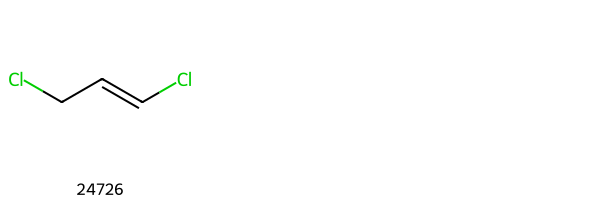

#### Identity_type: same_stereo
24726 "C(/C=C/Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"


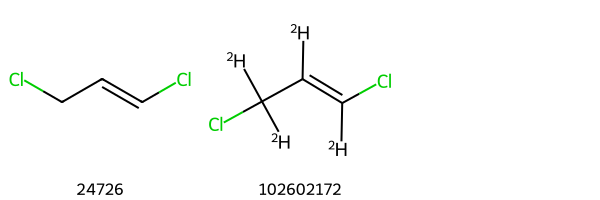

#### Identity_type: same_isotope
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"


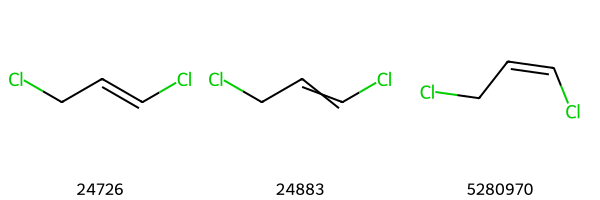

#### Identity_type: same_connectivity
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"
131875718 "[2H]C(=C([2H])Cl)C([2H])([2H])Cl"


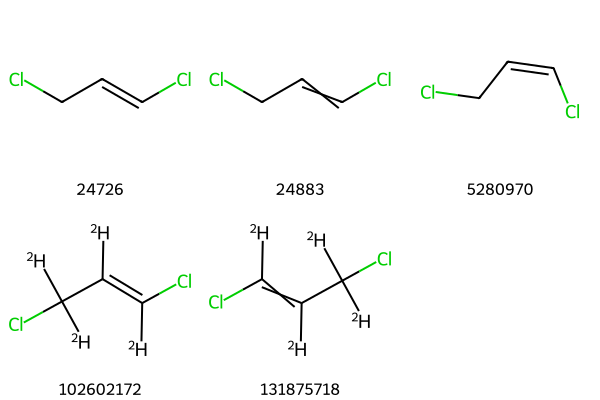

In [33]:
import requests
import time
import io

from rdkit import Chem
from rdkit.Chem import Draw

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : 'C(/C=C/Cl)Cl' }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)
    
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)
    
    mycids = []
    mysmiles = []
    
    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)
    
    for line in file :
        
        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []
    
    for x in mysmiles :
        
        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
        mols.append(mol)
    
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)
            
    time.sleep(0.2)

### Similarity search

PubChem supports 2-dimensional (2-D) and 3-dimensional (3-D) similarity searches.  Because molecular similarity is not a measurable physical observable but a subjective concept, many approaches have been developed to evaluate it.  Detailed discussion on how PubChem quantifyies molecular similarity, read the following LibreTexts page:
    
**Searching PubChem Using a Non-Textual Query** (https://bit.ly/2lPznCo)


The code cell below demonstrates how to perform 2-D and 3-D similarity searches.

In [34]:
mydata = { 'smiles' : "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl" }
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
print(cids)

# Number of CIDs: 36
['9875401', '6433119', '11524901', '25255944', '159596345', '154630277', '145624246', '145624236', '144489887', '143433422', '123868009', '68152323', '56598114', '56589668', '25190310', '25164166', '11994745', '25190129', '25190130', '25190186', '25190187', '25190188', '25190189', '25190190', '25190248', '25190249', '25190250', '25190251', '25190252', '25190311', '25255845', '25255945', '25255946', '49849874', '133687098', '156594383']


It is worth mentioning that the parameter name "Threshold" is **case-sensitive**.  If "threshold" is used (rather than "Threshold"), it will be ignored and the default value (0.90) will be used for the parameter.  \[As a matter of fact, all optional parameter names in PUG-REST are case-sensitive.]

In [35]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" is ignored.

res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()

print("# Number of CIDs:", len(cids1), "vs.", len(cids2))

# Number of CIDs: 216 vs. 995


It is possible to run 3-D similarity search using PUG-REST.  However, because 3-D similarity search takes much longer than 2-D similarity search, it often exceeds the 30-second time limit and returns a time-out error, especially when the query molecule is big.

In addition, for 3-D similarity search, it is **not** possible to adjust the similarity threshold (that is, the optional "Threshold" parameter does not work).  3-D similarity search uses a shape-Tanimoto (ST) of >=0.80 and a color-Tanimoto (CT) of >=0.50 as a similarity threshold.  Read the libreTexts page for more details (https://bit.ly/2lPznCo).

In [36]:
mydata = { 'smiles' : 'CC(=O)OC1=CC=CC=C1C(=O)O'}
url = prolog + "/compound/fastsimilarity_3d/smiles/cids/txt"
res = requests.post(url, data=mydata)
cids = res.text.split()
print(len(cids))

2994


### Substructure/Superstructure search

When a chemical structure occurs as a part of a bigger chemical structure, the former is called a substructure and the latter is referred to as a superstructure (https://bit.ly/2lPznCo).  PUG-REST supports both substructure and superstructure searches.  For example, below is an example for substructure search using the core structure of antibiotic drugs called cephalosporins as a query (https://en.wikipedia.org/wiki/Cephalosporin). 

In [37]:
query = 'C12(SCC(=C(N1C([C@H]2NC(=O)[*])=O)C(=O)O[H])[*])[H]'

mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 25945


An important thing to remember about substructure search is that, if the query structure is not specific enough (that is, not big enough), it will return too many hits for the PubChem server can handle.  For example, if you perform substructure search using the "C-C" as a query, it will give you an error, because PubChem has ~96 million (organic) compounds with more than two carbon atoms and most of them will have the "C-C" unit. Therefore, if you get an "time-out" error while doing substructure search, consider providing more specific structure as an input query.

### Molecular formula search

Strictly speaking, molecular formula search is not structure search, but its PUG-REST request URL is constructed in a similar way to structure searches like identity, similarity, and substructure/superstructure searches.

In [38]:
query = 'C22H28FN3O6S'    # Molecular formula for Crestor (Rosuvastatin: CID 446157)

url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 204


It is possible to allow other elements to be present in addition to those specified by the query formula, as shown in the following example.


In [39]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 228


## PUG-View

**PUG-View** (https://doi.org/10.1186/s13321-019-0375-2) is a Representational State Transfer (REST)-style web service interface specialized for accessing **annotation data** contained in PubChem.<br>  
Many users are often confused with PUG-REST and PUG-View.  PUG-View can be used to download the annotation data displayed on the Summary page of a PubChem record (e.g., compound).  Because these annotations are collected from various sources, they are difficult to format in a consistent way.  So they are usually in a unstructured text format, as shown in the following example.

https://pubchem.ncbi.nlm.nih.gov/compound/7206#section=Ecotoxicity-Values

The syntax of a PUG-REST request URL is very simple.

![pug-view-syntax](images/pug-view-syntax.webp)

**Note:**  <br>
PUG-View can take only one record identifier.  In contrast, some PUG-REST request URL can have multiple identifiers, as shown in a previous section.

### Getting a specific annotation for a compound

Suppose that we want to download non-human toxicity values for CID 7206

https://pubchem.ncbi.nlm.nih.gov/compound/7206#section=Non-Human-Toxicity-Values

In [40]:
import json

In [41]:
pugview = "https://pubchem.ncbi.nlm.nih.gov/rest/pug_view"
pugdata = "data"
pugrecord = "compound/7206"
pugout  = "json"
pugoption = "heading=Non+Human+Toxicity+Values"

url     = pugview + '/' + pugdata + '/' + pugrecord + '/' + pugout + "?" + pugoption
print(url)

res = requests.get(url)
#print(res.text)

tox_vals = res.json()
tox_vals['Record']['Section'][0]['Section'][0]['Section'][0]['Information']

https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/7206/json?heading=Non+Human+Toxicity+Values


[{'ReferenceNumber': 13,
  'Description': 'PEER REVIEWED',
  'Reference': ['WHO; Environ Health Criteria: Phenoxyherbicides p.65 (1984)'],
  'Value': {'StringWithMarkup': [{'String': 'LD50 Mouse oral 380 mg/kg'}]}},
 {'ReferenceNumber': 13,
  'Description': 'PEER REVIEWED',
  'Reference': ['WHO; Environ Health Criteria: Phenoxyherbicides p.65 (1984)'],
  'Value': {'StringWithMarkup': [{'String': 'LD50 Rat oral 920 mg/kg'}]}},
 {'ReferenceNumber': 13,
  'Description': 'PEER REVIEWED',
  'Reference': ['WHO; Environ Health Criteria: 2,4-Dichlorophenoxyacetic Acid (2,4-D) p.66 (1984)'],
  'Value': {'StringWithMarkup': [{'String': 'LD50 Chick (M,F) 2000 mg/kg (1350-2960 mg/kg) oral acid equivalent of 1503 mg/kg /From table, 2,4-D butyl esters/',
     'Markup': [{'Start': 94,
       'Length': 5,
       'URL': 'https://pubchem.ncbi.nlm.nih.gov/compound/2%2C4-D',
       'Type': 'PubChem Internal Link',
       'Extra': 'CID-1486'}]}]}},
 {'ReferenceNumber': 13,
  'Description': 'PEER REVIEWED',

We need to parse the returned json data to extract the desired data.

In [42]:
section = tox_vals['Record']['Section'][0]['Section'][0]['Section'][0]

In [43]:
for i_item in section['Information']:
    for j_item in i_item['Value']['StringWithMarkup']:
        print("*", j_item['String'])


* LD50 Mouse oral 380 mg/kg
* LD50 Rat oral 920 mg/kg
* LD50 Chick (M,F) 2000 mg/kg (1350-2960 mg/kg) oral acid equivalent of 1503 mg/kg /From table, 2,4-D butyl esters/
* LD50 Rat oral 600 mg/kg
* For more Non-Human Toxicity Values (Complete) data for 2,4-D BUTYL ESTER (8 total), please visit the HSDB record page.


### Getting full annotations for a compound

It is also possible to download (the majority of) annotation data presented on the Compound Summary page.

In [44]:
pugview = "https://pubchem.ncbi.nlm.nih.gov/rest/pug_view"
pugdata = "data"
pugrecord = "compound/7206"
pugout  = "json"
#pugoption = "heading=Non+Human+Toxicity+Values"

url     = pugview + '/' + pugdata + '/' + pugrecord + '/' + pugout
print(url)

res = requests.get(url)
#print(res.json())      # avoid printing this, because it's very long.

with open('cid-7206-tox-values.json', 'w') as file:
    json.dump(res.json(), file, indent=4)

https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/7206/json


### Getting all annotations for a specific heading

While some users often want to get annotation data for many compounds, PUG-View can take only one record identifier (e.g., only one CID), as mentioned in a previous section.

However, it is possible to get all annotations presented in a specific section for **all** compounds.


In [45]:
pugview = "https://pubchem.ncbi.nlm.nih.gov/rest/pug_view"
pugdata = "annotations"
pugrecord = "heading/Non-Human%20Toxicity%20Values"
pugout  = "json"

#https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/annotations/heading/Viscosity/JSON

url     = pugview + '/' + pugdata + '/' + pugrecord + '/' + pugout
print(url)

res = requests.get(url)
#print(res.json())

with open('cid-7206-tox-values.json', 'w') as file:
    json.dump(res.json(), file, indent=4)

https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/annotations/heading/Non-Human%20Toxicity%20Values/json


The downloaded file contains the non-human toxicity values data for all compounds.  From this file, you can extract the data for a set of compounds that you want.

Also keep in mind that some headings have more data than others, and retrieval is limited. There will be "Page" and "TotalPages" values at the end of the request data, that will indicate the given page number and whether there is more data than shown in the given request (that is, whether TotalPages is greater than one). 

```
...
    ],
    "Page": 1,
    "TotalPages": 4
  }
}
```

By default, page #1 is returned, but subsequent pages (up to the TotalPages limit) can be accessed by adding a page argument. 

In [46]:
pugview = "https://pubchem.ncbi.nlm.nih.gov/rest/pug_view"
pugdata = "annotations"
pugrecord = "heading/Non-Human%20Toxicity%20Values"
pugout  = "json"
pugoption = "page=2"

#https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/annotations/heading/Viscosity/JSON

url     = pugview + '/' + pugdata + '/' + pugrecord + '/' + pugout + '?' + pugoption
print(url)

res = requests.get(url)
#print(res.json())

#with open('cid-7206-tox-values.json', 'w') as file:
#    json.dump(res.json(), file, indent=4)

https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/annotations/heading/Non-Human%20Toxicity%20Values/json?page=2


## Entrez Utilities (E-Utils)

Entrez is the search and retrieval system used for PubChem and other major NCBI databases, including PubMed, Nucleotide and Protein Sequences, Protein Structures, Genome, Taxonomy, BioSystems, Gene Expression Omnibus (GEO).  
  NCBI's Entrez Utilities (also called E-Utilities or E-Utils) are used for programmatic access to information contained in the Entrez system. For more information, please read the following document:<br><br>
https://www.ncbi.nlm.nih.gov/books/NBK25501/<br><br>
  If you need to make a lot of frequent requests using E-Utils, you will need to get an API keys, as described in E-Utils' usage guidelines:<br>
<br>
https://www.ncbi.nlm.nih.gov/books/NBK25497/#chapter2.Usage_Guidelines_and_Requiremen<br><br> 
  Note that PUG-REST and PUG-View do **not** require API keys.

  In this section, we look into how many compounds satisfy Lipinski's rule of five (Ro5), by programmatically accessing relevant data through E-Utilities.
  
First, we define a function that gets the number of drug-like compounds through E-Utilities.

In [47]:
from itertools import combinations

In [48]:
#!pip install Bio

In [49]:
from Bio import Entrez
Entrez.email = "kimsungh@ncbi.nlm.nih.gov"

In [50]:
def drug_likeness(rules) :
    
    cid_counts = []
    
    print("#Viols", "Combinations", "#CIDs", sep="\t")
    
    idxs = list(range(0,len(rules)))  # Indexes for individual criteria: [0,1,2,3]
    
    for i in range(0,len(rules)+1):   # Num_violations (from 0 to all)
                                      # Ro5-0, Ro5-1, Ro5-2, Ro5-3, Ro5-4
        print("-" * 40)    
        count = 0

        # Get all possible cases for a given number of violations (i).
        # For example, Lipinski's Rule of five (Ro5) has four criteria, and
        # the cases that violates 2 of them (i.e., Ro5-2) can be computed using
        # "combination(4,2)", which results in the following 6 combinations:
        #
        #      (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)
        #
        combs=combinations(idxs, i)
        
        for comb in list(combs):  # loop over all combinations

            # Used for printing the combinations
            #    0 = criterion violated
            #    1 = criterion met
            comb_str = [1] * len(rules)  # initinalized to [1,1,...,1,1]

            term="all[filt]"
        
            for j in idxs:  # loop over individual criteria
                
                if j in list(comb):   # criteria violated
                    term = term + " NOT " + rules[j]
                    comb_str[j] = 0
                else:                 # criteria met
                    term = term + " AND " + rules[j]
                
            #print(term)
        
            handle=Entrez.esearch(db="pccompound", term=term, rettype="count")
            record=Entrez.read(handle)
            print(i, comb_str, record['Count'], sep="\t")
        
            count=count+int(record['Count'])
        
            time.sleep(0.34)
    
        cid_counts.append(count)
            
    return(cid_counts)

Now download the record counts for drug-like compounds (based on the Rule of five).

In [51]:
Ro5_rules = [ "0:5[HBDC]", "0:10[HBAC]", "0:500[MW]", "-1000:5[XLogP]" ]

In [52]:
Ro5_counts = drug_likeness(Ro5_rules)

#Viols	Combinations	#CIDs
----------------------------------------
0	[1, 1, 1, 1]	78498882
----------------------------------------
1	[0, 1, 1, 1]	236872
1	[1, 0, 1, 1]	334564
1	[1, 1, 0, 1]	4203384
1	[1, 1, 1, 0]	14593862
----------------------------------------
2	[0, 0, 1, 1]	75220
2	[0, 1, 0, 1]	228254
2	[0, 1, 1, 0]	66784
2	[1, 0, 0, 1]	1216065
2	[1, 0, 1, 0]	119509
2	[1, 1, 0, 0]	10166680
----------------------------------------
3	[0, 0, 0, 1]	862250
3	[0, 0, 1, 0]	25033
3	[0, 1, 0, 0]	181444
3	[1, 0, 0, 0]	2749142
----------------------------------------
4	[0, 0, 0, 0]	1123629


Let's create a figure that summarizes the drug-likeness of PubChem compounds.

In [53]:
import matplotlib.pyplot as plt

In [54]:
Ro5_classes = ['Ro5', 'Ro5\N{MINUS SIGN}1', 'Ro5\N{MINUS SIGN}2', 
               'Ro5\N{MINUS SIGN}3', 'Ro5\N{MINUS SIGN}4']

In [55]:
Ro5_percents = [ round( x / sum(Ro5_counts) * 100, 2) for x in Ro5_counts ]

In [56]:
Ro5_barlabels = []
for count, pct in zip(Ro5_counts, Ro5_percents):
    Ro5_barlabels.append( '  {:,}'.format(count) + "\n  (" + str(pct) + "%)" )

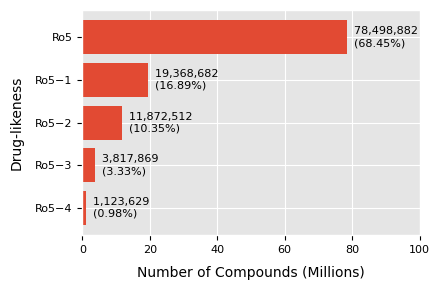

In [57]:
plt.style.use('ggplot')
plt.figure(figsize=(4.5, 3.0))
p = plt.barh(Ro5_classes[::-1], [ x / 1000000 for x in Ro5_counts[::-1] ])
plt.bar_label(p, Ro5_barlabels[::-1], fontsize=8)
plt.xlabel("Number of Compounds (Millions)", color='black', labelpad=8, fontsize=10)
plt.ylabel("Drug-likeness", color='black', labelpad=8, fontsize=10)
plt.tick_params(axis='x', colors='black', labelsize=8)
plt.tick_params(axis='y', colors='black', labelsize=8)
plt.xlim(0,100)
plt.tight_layout()
plt.savefig("drug-likeness.tif", dpi=300, bbox_inches = "tight")

## List Gateway

### Entrez to PUG-REST

In [58]:
handle=Entrez.esearch(db="pccompound", 
                      term='249.99:250.01[ExactMass]', 
                      usehistory='y')
record=Entrez.read(handle)

print("#-- Variable type:", type(record))
print("#-- Variable content:\n", record)

#-- Variable type: <class 'Bio.Entrez.Parser.DictionaryElement'>
#-- Variable content:
 {'Count': '5215', 'RetMax': '20', 'RetStart': '0', 'QueryKey': '1', 'WebEnv': 'MCID_641fc39a6e55ff663d7cfc71', 'IdList': ['167271328', '167255099', '167244748', '167240249', '167194050', '167187720', '167168355', '167113868', '167104881', '167067182', '167016117', '166921863', '166895788', '166843507', '166833644', '166833344', '166811952', '166791471', '166755910', '166729607'], 'TranslationSet': [], 'TranslationStack': [{'Term': '0000249.990000[ExactMass]', 'Field': 'ExactMass', 'Count': '0', 'Explode': 'N'}, {'Term': '0000250.010000[ExactMass]', 'Field': 'ExactMass', 'Count': '0', 'Explode': 'N'}, 'RANGE'], 'QueryTranslation': '0000249.990000[ExactMass] : 0000250.010000[ExactMass]'}


The type of ```record``` is 'Bio.Entrez.Parser.DictionaryElement', which is similar to a python dictionary.  The content of this variable can also be accessed in a similar manner.

In [59]:
print("Count         = ", record['Count'])
print("RetMax        = ", record['RetMax'])
print("Num_compounds = ", len(record['IdList']))

Count         =  5215
RetMax        =  20
Num_compounds =  20


The search found 5000+ compounds, but only 20 compounds were retrieved.  This limit needs to be adjusted to get all compounds.

In [60]:
handle=Entrez.esearch(db="pccompound", 
                      term='249.99:250.01[ExactMass]', 
                      retmax=10000,      # Adjusted to get all CIDs.
                      usehistory='y')
record=Entrez.read(handle)

print("Count         = ", record['Count'])
print("RetMax        = ", record['RetMax'])
print("Num_compounds = ", len(record['IdList']))

Count         =  5215
RetMax        =  5215
Num_compounds =  5215


Now let's share this compound list with PUG-REST using the list gateway.

In [61]:
querykey = record['QueryKey']
webenv = record['WebEnv']

In [62]:
db = "pccompound"
action = 'entrez_to_pug'
lg_cgi = 'https://pubchem.ncbi.nlm.nih.gov/list_gateway/list_gateway.cgi'
lg_url = lg_cgi + "?action=" + action \
                + "&entrez_db=" + db \
                + "&entrez_query_key=" + querykey \
                + "&entrez_webenv=" + webenv

In [63]:
res = requests.get(lg_url)
print(res.text)

<?xml version="1.0"?>
<Response>
  <Response_list-size>5215</Response_list-size>
  <Response_pug-listkey>3702198259544985647</Response_pug-listkey>
</Response>



In [64]:
import re

pattern = r'<Response_pug-listkey>(.*)</Response_pug-listkey>'
listkey = re.findall(pattern, res.text)[0]
print(listkey)

3702198259544985647


In [65]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pug_input = "/compound/listkey/" + listkey
pug_operation = "/Property/MolecularFormula,MolecularWeight,ExactMass,MonoisotopicMass,IsotopeAtomCount,CovalentUnitCount,IsomericSMILES"
pug_output = "/csv"

pugrest_url = pugrest + pug_input + pug_operation + pug_output
print(pugrest_url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/3702198259544985647/Property/MolecularFormula,MolecularWeight,ExactMass,MonoisotopicMass,IsotopeAtomCount,CovalentUnitCount,IsomericSMILES/csv


In [66]:
res = requests.get(pugrest_url)  # Should not take longer than 30 seconds.
#res.text

In [67]:
with open('entrez-to-pug.csv', 'w') as file:
    file.write(res.text)

Please check the content of the 'entrez-to-pug.csv' file.

### PUG-REST to Entrez

It is also possible to send a list of records retrieved through PUG-REST to the Entrez system. To show how this can be done, we will retrieve drug-like compounds tested in an assay (AID 1794796 as an example).
  
https://pubchem.ncbi.nlm.nih.gov/bioassay/1794796  
  
In essence, this task is a two-step process.

- Step 1: Use PUG-REST to retrieve all compounds tested in AID 1794796.  Rather than getting the list of compounds, it will be stored on the server and the corresponding listkey will be returned.

- Step 2: Use the list key to share the compound list with the Entrez system and identify those compounds that satisfy Lipinsk's rule of five.

The code in this cell gets a list of compounds tested in the assay in a TXT format.

In [68]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pug_input = "/assay/aid/1794796"
pug_operation = "/cids"
pug_output = "/txt"

pugrest_url = pugrest + pug_input + pug_operation + pug_output
print(pugrest_url)

res = requests.get(pugrest_url)
#res.text

https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/1794796/cids/txt


However, what we want is to store the list on the server and get the listkey that allows you to access the list.


In [69]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pug_input = "/assay/aid/1794796"
pug_operation = "/cids"
pug_output = "/json"                 # changed from txt to json/xml
pug_option = "?list_return=listkey"  # return a listkey

pugrest_url = pugrest + pug_input + pug_operation + pug_output + pug_option
print(pugrest_url)

res = requests.get(pugrest_url)
pug_list_key = res.json()
pug_list_key

https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/1794796/cids/json?list_return=listkey


{'IdentifierList': {'ListKey': '350550685690912870',
  'Size': 68590,
  'EntrezDB': 'pccompound',
  'EntrezWebEnv': 'MCID_641fc3b149979070dd5d78cd',
  'EntrezQueryKey': 1,
  'EntrezURL': 'https://www.ncbi.nlm.nih.gov/sites/entrez?cmd=HistorySearch&WebEnvRq=1&hinit=true&db=pccompound&WebEnv=MCID_641fc3b149979070dd5d78cd&query_key=1'}}

The returned data contains the list key (```ListKey```), along with the corresponding database name (```EntrezDB```), webenv (```EntrezWebEnv```), and query_key (```EntreQueryKey```) values.

Now let's formulate an Entrez query to select compounds that satisfy the Rule of five and another query that find those not satisfying the rule of five.

In [70]:
db = pug_list_key['IdentifierList']['EntrezDB']
webenv = pug_list_key['IdentifierList']['EntrezWebEnv']
querykey = pug_list_key['IdentifierList']['EntrezQueryKey']
#print(db)
#print(webenv)
#print(querykey)
query1 = '#' + str(querykey) + ' AND "lipinski rule of 5"[Filter]'
query2 = '#' + str(querykey) + ' NOT "lipinski rule of 5"[Filter]'
print(query1)
print(query2)

#1 AND "lipinski rule of 5"[Filter]
#1 NOT "lipinski rule of 5"[Filter]


In [71]:
handle1=Entrez.esearch(db=db, 
                      term=query1,  # those satisfying Ro5
                      webenv=webenv,
                      retmax=20,  # Default. Adjust it to get the full list.
                      usehistory='y')
record1=Entrez.read(handle1)
print("#-- Variable content:\n", record1)

#-- Variable content:
 {'Count': '48107', 'RetMax': '20', 'RetStart': '0', 'QueryKey': '2', 'WebEnv': 'MCID_641fc3b149979070dd5d78cd', 'IdList': ['164687498', '164687494', '164687491', '164687490', '164687487', '164687484', '164687482', '164687481', '164687480', '164687479', '164687477', '164687473', '164687470', '164687469', '164687466', '164687465', '164687462', '164687461', '164687458', '164687457'], 'TranslationSet': [], 'TranslationStack': [{'Term': '"lipinski rule of 5"[Filter]', 'Field': 'Filter', 'Count': '78485953', 'Explode': 'N'}, 'AND'], 'QueryTranslation': '#1 AND "lipinski rule of 5"[Filter]'}


Check the ```Count``` value in the returned data.  There are 48k+ compounds satisfying Ro5, but only 20 compounds are returned.  To get all CIDs, the ```retmax``` value should be increased.

In [72]:
handle2=Entrez.esearch(db=db, 
                      term=query2,  # those not satisfying Ro5
                      webenv=webenv,
                      retmax=20,  # Default. Adjust to get the full list.
                      usehistory='y')
record2=Entrez.read(handle2)
print("#-- Variable content:\n", record2)

#-- Variable content:
 {'Count': '20483', 'RetMax': '20', 'RetStart': '0', 'QueryKey': '3', 'WebEnv': 'MCID_641fc3b149979070dd5d78cd', 'IdList': ['164687497', '164687496', '164687495', '164687493', '164687492', '164687489', '164687488', '164687485', '164687483', '164687478', '164687476', '164687475', '164687474', '164687472', '164687471', '164687468', '164687467', '164687464', '164687463', '164687460'], 'TranslationSet': [], 'TranslationStack': [{'Term': '"lipinski rule of 5"[Filter]', 'Field': 'Filter', 'Count': '78485953', 'Explode': 'N'}, 'NOT'], 'QueryTranslation': '#1 NOT "lipinski rule of 5"[Filter]'}


In [73]:
with open('pug-to-entrez1.txt', 'w') as file:
    file.write(str(record1))

In [74]:
with open('pug-to-entrez2.csv', 'w') as file:
    file.write(str(record2))